In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd
import preprocessing2
import cosine2
import plotly.express as px

from pdfstructure.hierarchy.parser import HierarchyParser
from pdfstructure.source import FileSource
from pdfstructure.printer import JsonFilePrinter
import pathlib
import json

In [3]:
def text_on_page(dict_var, id_json, list_res, page):
    if type(dict_var) is dict:
        for k, v in dict_var.items():
            if k == id_json and v == page:
                if v > page: return list_res
                list_res.append(dict_var["text"])
            elif isinstance(v, dict):
                text_on_page(v, id_json, list_res, page)   
            elif isinstance(v, list):
                for item in v:
                    text_on_page(item, id_json, list_res, page)
    return list_res

In [4]:
def get_page(data, page):
    lines = []
    for chunk in data["elements"]:
        lines.extend(text_on_page(chunk, "page", [], page))             
    return lines

In [5]:
def get_histogram(docs, top = 20):
    tokens = []
    for s in docs.values():
        tokens += s.split()
    uniques, counts = np.unique(tokens, return_counts = True)
    sorted_inds = np.argsort(counts)
    uniques_sorted = uniques[sorted_inds[-top:]][::-1]
    counts_sorted = counts[sorted_inds[-top:]][::-1]
    return (uniques_sorted, counts_sorted)

In [6]:
file = '/home/vince/Documents/Code/microgoogle/CS4300_microGoogle/pdfs/Nurse.pdf'
start = 1
end = 50

In [7]:
parser = HierarchyParser()
source = FileSource(file, page_numbers=list(range(start-1, end)))

In [8]:
# @st.cache(suppress_st_warning=True)
def fetch_doc(source):
    document = parser.parse_pdf(source)
    printer = JsonFilePrinter()
    file_path = pathlib.Path('pdf.json')
    printer.print(document, file_path=str(file_path.absolute()))
    with open('pdf.json') as json_file:
            data = json.load(json_file)
    pages = {i : get_page(data, i) for i in range(start-1, end)}
    return pages

In [9]:
json = fetch_doc(source)

In [10]:
json

{0: [],
 1: ['00doenges-FM  2/2/04  11:54 AM  Page ii',
  'GORDON’S FUNCTIONAL HEALTH',
  'PATTERNS THROUGH 2003*',
  '522–525',
  'HEALTH PERCEPTION-HEALTH MANAGEMENT PATTERN\nHealth maintenance, ineffective 275–278\nTherapeutic regimen: effective management 517–519\nTherapeutic regimen: ineffective management\nTherapeutic regimen: readiness for enhanced management 525–527\nTherapeutic regimen: family, ineffective management 520–522\nTherapeutic regimen: community, ineffective management\nNoncompliance (specify) 343–347\nHealth-seeking behaviors (specify) 278–281\nEnergy field, disturbed 208–211\nFalls, risk for\nInfection, risk for\nInjury (trauma), risk for 310–313\nProtection, ineffective 411–412\nPoisoning, risk for 393–396\nSuffocation, risk for 500–503\nPerioperative positioning injury, risk for 313–316\nSudden infant death syndrome 185–189',
  '307–310',
  '515–517',
  '217–221',
  '339–343',
  '304–306',
  '110–114',
  'NUTRITIONAL-METABOLIC PATTERN\nNutrition: more than body 

In [11]:
len(json)

50

In [40]:
tmp = [i for j in [i[1] for i in json.items()] for i in j]

In [45]:
word_window = 10

In [48]:
count_words = lambda doc: len(list(''.join(list(doc)).split()))

In [ ]:
### [i for i in list(enumerate(tmp)) if count_words(i[1])>word_window]

In [15]:
import cosine3

In [16]:
tfidf_vectorizer = cosine3.get_tfidf_vectorizer()

In [20]:
import preprocessing3

In [24]:
import json as js

In [26]:
def fetch_pages(source):
    document = parser.parse_pdf(source)
    printer = JsonFilePrinter()
    file_path = pathlib.Path('pdf.json')
    printer.print(document, file_path=str(file_path.absolute()))

    with open('pdf.json') as json_file:
        data = js.load(json_file)
    json_file.close()
    pages = {i + 1 : get_page(data, i) for i in range(0, end)}
    return pages, file_path
pages, file_path = fetch_pages(source)

In [27]:
(formatted_docs, paragraph_page_idx) = preprocessing3.get_formatted_docs(pages)

In [28]:
preprocessed_docs = preprocessing3.get_preprocessed_docs(formatted_docs)

In [29]:
tfidf_matrix = tfidf_vectorizer.fit_transform(list(preprocessed_docs.values())).toarray()

In [32]:
np.shape(tfidf_matrix)

(964, 1605)

In [35]:
tmp = tfidf_matrix@tfidf_matrix.T

In [37]:
import matplotlib.pyplot as plt

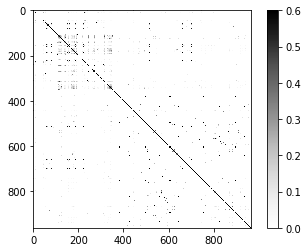

In [39]:
plt.imshow(tmp, interpolation='none',
           cmap=plt.cm.Greys, vmin=0, vmax=0.6)
plt.colorbar()

# plt.xticks(range(n_speakers_to_analyze), speakers_to_analyze, rotation=90)
# plt.yticks(range(n_speakers_to_analyze), speakers_to_analyze)
plt.show()